# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


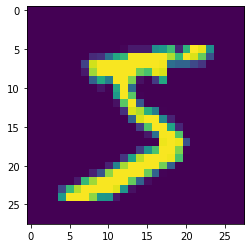

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(15, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(31, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(63, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(31, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(63, (3, 3), activation="relu")`
  import sys


In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 31)        4216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 31)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 63)        17640     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 10)        640       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [31]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.1524 - acc: 0.9538
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0563 - acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0412 - acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0316 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0273 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0222 - acc: 0.9928
Epoch 7/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0185 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0166 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0137 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0129 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [33]:
print(score)

[0.036392998835679376, 0.9903]


In [0]:
y_pred = model.predict(X_test)

In [35]:
print(y_pred[:9])
print(y_test[:9])

[[8.58723908e-16 2.61625267e-17 1.02176245e-09 3.25634031e-09
  2.13916206e-18 1.07855416e-13 1.40717040e-23 9.99994040e-01
  1.01184602e-10 5.93716868e-06]
 [4.52309631e-12 3.88383824e-13 1.00000000e+00 2.29178909e-18
  3.68181766e-21 1.81580129e-23 6.66032510e-14 6.63185917e-20
  4.85439029e-15 7.42235119e-18]
 [7.10767765e-08 9.99996066e-01 1.40181546e-08 1.22051414e-11
  2.57749252e-06 3.94764027e-10 2.15512364e-09 8.47865181e-07
  1.58013165e-07 1.84560363e-07]
 [9.99999523e-01 3.15826865e-15 1.43153427e-08 7.74342535e-11
  3.32000898e-12 8.86717200e-10 2.90784186e-07 6.57254589e-12
  7.41902428e-10 1.98433597e-07]
 [1.29104802e-16 1.91352048e-15 1.78498839e-12 1.01367338e-14
  9.99999881e-01 3.62720896e-15 6.56394166e-12 2.18650646e-14
  1.78573181e-11 1.50210312e-07]
 [9.28671640e-10 9.99998212e-01 2.66269158e-08 1.06863596e-12
  5.66391805e-07 3.58192724e-13 4.86234013e-12 1.13118438e-06
  7.35994865e-09 5.82980277e-08]
 [1.09253615e-21 3.35622203e-14 2.48737923e-12 4.03805190e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

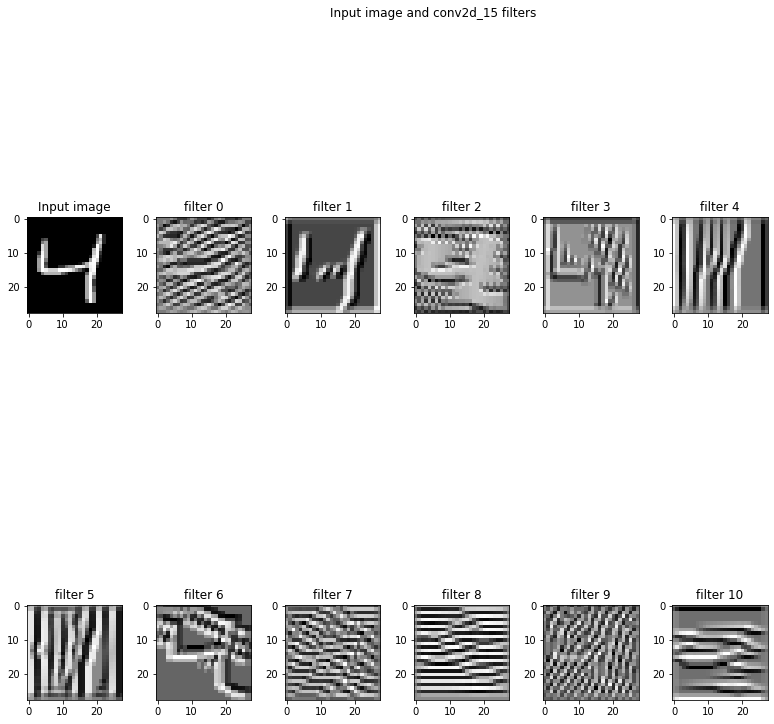

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_15'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()